<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Imports</h2>     

In [1]:
from fancyimpute import IterativeImputer
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from bs4 import BeautifulSoup, Doctype
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException

(CVXPY) Jun 01 07:46:11 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Jun 01 07:46:11 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Jun 01 07:46:11 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


In [2]:
pd.set_option("display.max_colwidth", None)

---

<h1 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Data Preparation</h1>     

In [3]:
belgica_raw = pd.read_csv("belgica_raw.csv")

In [4]:
belgica_raw.head(5)

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,NaN,Round Robin,127,Olivier Rochus,W,63 62 62,Belgium
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,Belgium F3,Belgium,2013.07.01 - 2013.07.07,Clay,"$10,000",Round of 32,716,Julien Cagnina,W,46 63 75,Belgium
2,Louis Cant,NaN,NaN,NaN,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,Belgium F9,Belgium,2013.08.12 - 2013.08.18,Clay,"$10,000",Quarter-Finals,1947,Remy Chala,W,"60 67, 64",Belgium
3,Louis Cant,NaN,NaN,NaN,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,Belgium F5,"Nieuwpoort, Belgium",2015.07.06 - 2015.07.12,Clay,"$10,000",Round of 32,1907,Florian Simbozel,W,"36 76, 62",Belgium
4,Louis Cant,NaN,NaN,NaN,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,Belgium F6,"Knokke, Belgium",2015.07.13 - 2015.07.19,Clay,"$10,000",Round of 32,-,Zizou Bergs,W,61 60,Belgium


In [5]:
belgica_raw.shape[0]

5982

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Informação dos Players</h2>     

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;"> Web Scrapping</h3>    

In [6]:
WebScrapping = pd.read_csv("WebScrapping.csv")

In [7]:
WebScrapping.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025
3,Philipp Scholz,Germany,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,1995-01-24,NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,1989-04-08,NaN,94


In [8]:
WebScrapping.rename(columns={'Birt': 'Birth'}, inplace=True)

In [9]:
len(WebScrapping)

1200

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Players</h3>     

In [10]:
Oponent = belgica_raw[["Oponent"]]
Oponent = Oponent.drop_duplicates

In [11]:
Players = belgica_raw[["PlayerName", "Born", "Height", "Hand", "LinkPlayer"]]
Players = Players.drop_duplicates(subset = ["LinkPlayer"])
Players.head(3)

,PlayerName,Born,Height,Hand,LinkPlayer
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles
2,Louis Cant,NaN,NaN,NaN,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles


In [12]:
len(Players)

1200

In [13]:
len(Players[Players["Height"]==0])

8

In [14]:
Players['Height'].replace(0, np.nan, inplace=True)

In [15]:
# Mescla os dataframes, mantendo apenas as colunas em comum
AllPlayers = pd.merge(Players[["PlayerName", "Born", "Height", "Hand", "LinkPlayer"]], 
                     WebScrapping[["PlayerName", "Born", "Height", "Hand", "LinkPlayer", "Weight", "Birth", "Treinador", "Rank"]], 
                     on="LinkPlayer", how="left")

# Substitui os valores nulos do dataframe 1 pelos valores correspondentes do dataframe 2
AllPlayers["Born_x"].fillna(AllPlayers["Born_y"], inplace=True)
AllPlayers["Height_x"].fillna(AllPlayers["Height_y"], inplace=True)
AllPlayers["Hand_x"].fillna(AllPlayers["Hand_y"], inplace=True)

# Remove as colunas duplicadas (com sufixo _x e _y) e renomeia as colunas novas
AllPlayers.drop(columns=["Born_y", "Height_y", "Hand_y", "PlayerName_y"], inplace=True)
AllPlayers.rename(columns={"Born_x": "Born", "Height_x": "Height", "Hand_x": "Hand", "PlayerName_x":"PlayerName"}, inplace=True)

In [16]:
AllPlayers.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Weight', 'Birth',
       'Treinador', 'Rank'],
      dtype='object')

In [17]:
len(AllPlayers)

1200

In [18]:
AllPlayers.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birth,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025
3,Philipp Scholz,Germany,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,1995-01-24,NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,1989-04-08,NaN,94


In [19]:
AllPlayers.isnull().sum()

PlayerName      0
Born           21
Height          0
Hand            0
LinkPlayer      0
Weight          0
Birth          16
Treinador     624
Rank          182
dtype: int64

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">infoPlayers</h3>     

In [20]:
infoPlayers = AllPlayers
infoPlayers.head(3)

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birth,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025


In [21]:
belgica_raw.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Location', 'Date', 'Ground', 'Prize', 'GameRound', 'GameRank',
       'Oponent', 'WL', 'Score', 'país'],
      dtype='object')

In [22]:
infoPlayers.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Weight', 'Birth',
       'Treinador', 'Rank'],
      dtype='object')

In [23]:
belgica_raw = belgica_raw.drop(["Born", "Height", "Hand", "PlayerName"], axis=1)

In [24]:
belgica_raw = pd.merge(belgica_raw, infoPlayers, on=["LinkPlayer"], how="inner")
belgica_raw.tail(3)

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país,PlayerName,Born,Height,Hand,Weight,Birth,Treinador,Rank
5979,https://www.atptour.com/en/players/diego-junqueira/j214/player-activity?year=all&matchType=Singles,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,"�42,500",Round of 32,386,Germain Gigounon,L,46 06,Belgium,Diego Junqueira,"Tandil, Buenos Aires, Argentin",178.0,"Left-Handed, Unknown Backhand",72.0,1980-12-28,Walter Grinovero,68
5980,https://www.atptour.com/en/players/james-chaudry/cc86/player-activity?year=all&matchType=Singles,Belgium F1,Belgium,2010.08.09 - 2010.08.15,Clay,"$10,000",Round of 32,1334,Germain Gigounon,L,46 57,Belgium,James Chaudry,Great Britain,185.0,Right-Handed,78.0,1991-03-11,NaN,923
5981,https://www.atptour.com/en/players/filipp-smalyanyy/su42/player-activity?year=all&matchType=Singles,Belgium F11,Belgium,2013.08.26 - 2013.09.01,Clay,"$15,000",Round of 32,-,Kevin Farin,L,06 14 (RET),Belgium,Filipp Smalyanyy,Russia,185.0,"Right-Handed, Unknown Backhand",78.0,1995-02-08,NaN,NaN


<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">infoOponent</h3>     

In [25]:
infoOponent = AllPlayers
infoOponent = infoOponent.rename(columns={"PlayerName":"Oponent","Born":"BornOponent",
                                          "Height":"HeightOponent","Hand":"HandOponent",
                                          "Weight":"WeightOponent", "Birth":"BirthOponent",
                                          "Treinador":"TreinadorOponent", "Rank":"RankOponent"})
infoOponent

,Oponent,BornOponent,HeightOponent,HandOponent,LinkPlayer,WeightOponent,BirthOponent,TreinadorOponent,RankOponent
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025
3,Philipp Scholz,Germany,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,1995-01-24,NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,1989-04-08,NaN,94
...,...,...,...,...,...,...,...,...,...
1195,Marious Zelba,Australia,185.0,Right-Handed,https://www.atptour.com/en/players/marious-zelba/z243/player-activity?year=all&matchType=Singles,78.0,1990-05-15,NaN,786
1196,Clement Reix,France,185.0,Right-Handed,https://www.atptour.com/en/players/clement-reix/r852/player-activity?year=all&matchType=Singles,78.0,1983-10-09,NaN,437
1197,Diego Junqueira,"Tandil, Buenos Aires, Argentin",178.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/diego-junqueira/j214/player-activity?year=all&matchType=Singles,72.0,1980-12-28,Walter Grinovero,68
1198,James Chaudry,Great Britain,185.0,Right-Handed,https://www.atptour.com/en/players/james-chaudry/cc86/player-activity?year=all&matchType=Singles,78.0,1991-03-11,NaN,923


In [26]:
infoOponent.drop("LinkPlayer", axis=1, inplace=True)

In [27]:
infoOponent.head(3)

,Oponent,BornOponent,HeightOponent,HandOponent,WeightOponent,BirthOponent,TreinadorOponent,RankOponent
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,78.0,1990-11-08,NaN,1025


In [28]:
belgica_raw.tail(2)

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país,PlayerName,Born,Height,Hand,Weight,Birth,Treinador,Rank
5980,https://www.atptour.com/en/players/james-chaudry/cc86/player-activity?year=all&matchType=Singles,Belgium F1,Belgium,2010.08.09 - 2010.08.15,Clay,"$10,000",Round of 32,1334,Germain Gigounon,L,46 57,Belgium,James Chaudry,Great Britain,185.0,Right-Handed,78.0,1991-03-11,NaN,923
5981,https://www.atptour.com/en/players/filipp-smalyanyy/su42/player-activity?year=all&matchType=Singles,Belgium F11,Belgium,2013.08.26 - 2013.09.01,Clay,"$15,000",Round of 32,-,Kevin Farin,L,06 14 (RET),Belgium,Filipp Smalyanyy,Russia,185.0,"Right-Handed, Unknown Backhand",78.0,1995-02-08,NaN,NaN


In [29]:
belgica_raw = pd.merge(belgica_raw, infoOponent, on="Oponent", how="inner")

In [30]:
belgica_raw.columns

Index(['LinkPlayer', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'GameRank', 'Oponent', 'WL', 'Score', 'país', 'PlayerName',
       'Born', 'Height', 'Hand', 'Weight', 'Birth', 'Treinador', 'Rank',
       'BornOponent', 'HeightOponent', 'HandOponent', 'WeightOponent',
       'BirthOponent', 'TreinadorOponent', 'RankOponent'],
      dtype='object')

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Hand</h2>     

In [31]:
belgica_raw["mainHand"] = belgica_raw["Hand"].str.rsplit(",").str[0].str.strip()
belgica_raw["mainHandOponent"] = belgica_raw["HandOponent"].str.rsplit(",").str[0].str.strip()
belgica_raw.head(5)

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,...,Rank,BornOponent,HeightOponent,HandOponent,WeightOponent,BirthOponent,TreinadorOponent,RankOponent,mainHand,mainHandOponent
0,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,NaN,Round Robin,127,Olivier Rochus,W,...,1,"Namur, Belgium",168.0,"Right-Handed, One-Handed Backhand",65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed
1,https://www.atptour.com/en/players/sebastien-grosjean/g379/player-activity?year=all&matchType=Singles,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,NaN,Round Robin,71,Olivier Rochus,W,...,4,"Namur, Belgium",168.0,"Right-Handed, One-Handed Backhand",65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed
2,https://www.atptour.com/en/players/andrei-pavel/p280/player-activity?year=all&matchType=Singles,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,"$125,000",Quarter-Finals,50,Olivier Rochus,W,...,13,"Namur, Belgium",168.0,"Right-Handed, One-Handed Backhand",65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed
3,https://www.atptour.com/en/players/andy-roddick/r485/player-activity?year=all&matchType=Singles,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,NaN,Round Robin,31,Olivier Rochus,W,...,1,"Namur, Belgium",168.0,"Right-Handed, One-Handed Backhand",65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed
4,https://www.atptour.com/en/players/christophe-rochus/r336/player-activity?year=all&matchType=Singles,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,"$125,000",Round of 16,551,Olivier Rochus,W,...,39,"Namur, Belgium",168.0,"Right-Handed, One-Handed Backhand",65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed


In [32]:
belgica_raw.shape[0]

4259

In [33]:
belgica_raw=belgica_raw.drop("Hand",axis=1)
belgica_raw=belgica_raw.drop("HandOponent",axis=1)

In [34]:
belgica_raw["mainHand"].unique()

array(['Right-Handed', 'Left-Handed', 'Ambidextrous'], dtype=object)

In [35]:
belgica_raw["mainHandOponent"].unique()

array(['Right-Handed', 'Left-Handed', 'Ambidextrous'], dtype=object)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;"> Mão dos PlayerName</h3>    

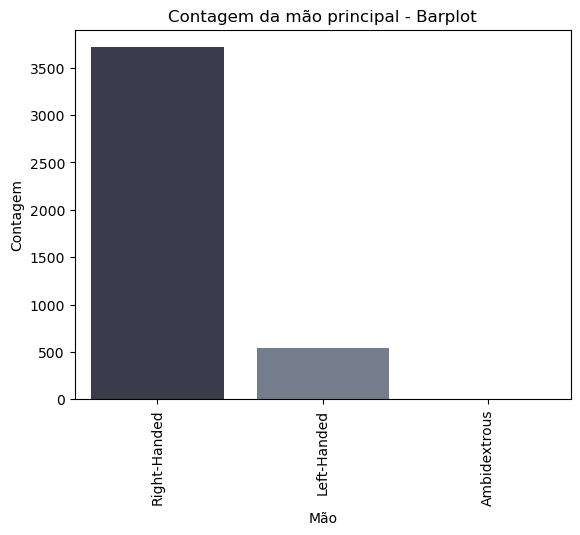

In [36]:
# Calcular a contagem de valores por categoria
contagem = belgica_raw["mainHand"].value_counts().sort_values(ascending=False)

# Criar o gráfico de barras
sns.barplot(x=contagem.index, y=contagem.values, palette="bone")

# Configurar rótulos e título
plt.xlabel("Mão")
plt.ylabel("Contagem")
plt.title("Contagem da mão principal - Barplot")

# Ajustar a rotação dos rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

<h4 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 30px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Omissos</h4>     

In [37]:
belgica_raw["mainHand"].isna().sum()

0

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;"> Mão dos Oponentes</h3>    

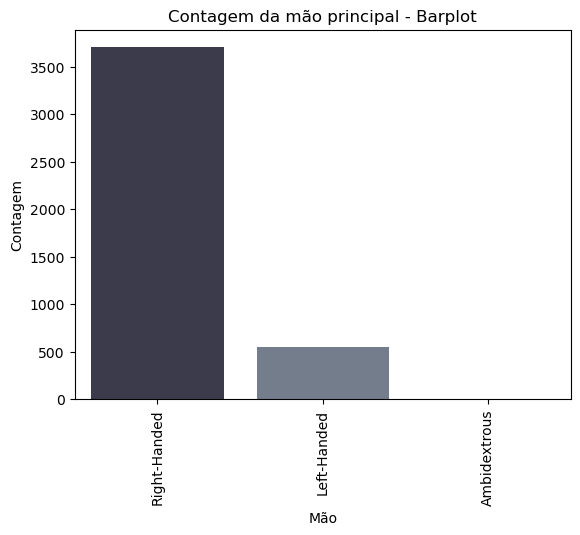

In [38]:
# Calcular a contagem de valores por categoria
contagem = belgica_raw["mainHandOponent"].value_counts().sort_values(ascending=False)

# Criar o gráfico de barras
sns.barplot(x=contagem.index, y=contagem.values, palette="bone")

# Configurar rótulos e título
plt.xlabel("Mão")
plt.ylabel("Contagem")
plt.title("Contagem da mão principal - Barplot")

# Ajustar a rotação dos rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Date</h2>     

In [39]:
belgica_raw['TournamentYear'] = belgica_raw['Date'].str.extract(r'^(\d{4})')

In [40]:
belgica_raw['TournamentYear'].unique()

array(['2013', '2001', '2007', '2005', '1999', '2009', '2012', '2014',
       '1998', '2000', '2004', '2008', '2006', '2010', '2011', '2015',
       '2018', '2017', '2016', '2019', '2020', '2021', '1995', '1997',
       '1994', '1990', '1992', '1996', '1993', '1991', '1989', '1988',
       '1987', '1972', '1986', '1985', '1983', '1984', '1982', '1981'],
      dtype=object)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Prize</h2>     

In [41]:
belgica_raw.isna().sum()

LinkPlayer             0
Tournament             0
Location               0
Date                   0
Ground                 0
Prize                 87
GameRound              0
GameRank               0
Oponent                0
WL                     0
Score                  0
país                   0
PlayerName             0
Born                  27
Height                 0
Weight                 0
Birth                 21
Treinador           1816
Rank                 306
BornOponent           34
HeightOponent          0
WeightOponent          0
BirthOponent          23
TreinadorOponent    2151
RankOponent          380
mainHand               0
mainHandOponent        0
TournamentYear         0
dtype: int64

In [42]:
belgica_raw["Prize"].fillna(0, inplace=True)
belgica_raw["Prize"] = belgica_raw["Prize"].astype(str) # convertendo a coluna para string
belgica_raw["TipoMoeda"] = belgica_raw["Prize"].apply(lambda x: "Dolar" if str(x).startswith("$") else ("Euro" if str(x).startswith("�") else None))
belgica_raw.head()

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,...,BornOponent,HeightOponent,WeightOponent,BirthOponent,TreinadorOponent,RankOponent,mainHand,mainHandOponent,TournamentYear,TipoMoeda
0,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2013,None
1,https://www.atptour.com/en/players/sebastien-grosjean/g379/player-activity?year=all&matchType=Singles,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,71,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2001,None
2,https://www.atptour.com/en/players/andrei-pavel/p280/player-activity?year=all&matchType=Singles,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,"$125,000",Quarter-Finals,50,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2007,Dolar
3,https://www.atptour.com/en/players/andy-roddick/r485/player-activity?year=all&matchType=Singles,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,31,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2005,None
4,https://www.atptour.com/en/players/christophe-rochus/r336/player-activity?year=all&matchType=Singles,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,"$125,000",Round of 16,551,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,1999,Dolar


In [43]:
# Substituir caracteres indesejados usando expressões regulares
belgica_raw["Prize"] = belgica_raw["Prize"].str.replace(r"[^\d,]", "", regex=True)

# Remover todas as vírgulas restantes
belgica_raw["Prize"] = belgica_raw["Prize"].str.replace(",", "", regex=True)

# Converter a coluna para numérico
belgica_raw["Prize"] = pd.to_numeric(belgica_raw["Prize"], errors="coerce")

# Exibir o DataFrame atualizado
belgica_raw.head()

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,...,BornOponent,HeightOponent,WeightOponent,BirthOponent,TreinadorOponent,RankOponent,mainHand,mainHandOponent,TournamentYear,TipoMoeda
0,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2013,None
1,https://www.atptour.com/en/players/sebastien-grosjean/g379/player-activity?year=all&matchType=Singles,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,71,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2001,None
2,https://www.atptour.com/en/players/andrei-pavel/p280/player-activity?year=all&matchType=Singles,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,50,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2007,Dolar
3,https://www.atptour.com/en/players/andy-roddick/r485/player-activity?year=all&matchType=Singles,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,31,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2005,None
4,https://www.atptour.com/en/players/christophe-rochus/r336/player-activity?year=all&matchType=Singles,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,125000,Round of 16,551,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,1999,Dolar


<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Taxa de Câmbio</h3>     
https://www.bportugal.pt/taxas-cambio?mlid=828

In [44]:
Cambio = pd.read_csv("cambdia.csv", sep=";", skiprows=5)

In [45]:
Cambio.columns

Index(['Período (Dias Úteis)', 'Dólar australiano', 'Lev da Bulgária',
       'Dólar canadiano', 'Franco suíço', 'Libra de Chipre', 'Coroa checa',
       'Coroa dinamarquesa', 'Coroa Estónia', 'Libra esterlina',
       'Dracma grega', 'Dólar de Hong Kong', 'Forint húngaro',
       'Coroa islandesa', 'Iene japonês ', 'Won da Coreia do Sul ',
       'Litas da Lituana ', 'Lats da Letão ', 'Lira maltesa ',
       'Coroa norueguesa ', 'Dólar da Nova Zelândia ', 'Zloti polaco ',
       'Novo Leu da Roménia ', 'Coroa sueca ', 'Dólar de Singapura ',
       'Tolar esloveno ', 'Coroa eslovaca ', 'Nova Lira turca ',
       'Dólar dos Estados Unidos ', 'Rand da África do Sul ',
       'Real do Brasil ', 'Escudo de Cabo Verde ', 'Pataca de Macau ',
       'Direito de Saque Especial ', 'Yuan renmimbi da China ', 'Kuna Croata ',
       'Rupia indonésia ', 'Ringgit da Malásia ', 'Peso filipino ',
       'Rublo russo ', 'Baht da Tailândia ', 'Peso Mexicano ',
       'Rupia indiana ', 'Shequel de Israel

In [46]:
Cambio = Cambio[["Período (Dias Úteis)", "Dólar dos Estados Unidos "]]

In [47]:
Cambio

,Período (Dias Úteis),Dólar dos Estados Unidos
0,1999-01-04,1.1789
1,1999-01-05,1.179
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6361,2023-05-23,1.0779
6362,2023-05-24,1.0785
6363,2023-05-25,1.0735
6364,2023-05-26,1.0751


In [48]:
Cambio['Ano'] = pd.to_datetime(Cambio['Período (Dias Úteis)']).dt.year
Cambio.drop('Período (Dias Úteis)', axis=1)

,Dólar dos Estados Unidos,Ano
0,1.1789,1999
1,1.179,1999
2,1.1743,1999
3,1.1632,1999
4,1.1659,1999
...,...,...
6361,1.0779,2023
6362,1.0785,2023
6363,1.0735,2023
6364,1.0751,2023


In [49]:
Cambio = Cambio[Cambio['Dólar dos Estados Unidos '] != '-']

In [50]:
Cambio["Dólar dos Estados Unidos "].dtypes
Cambio["Dólar dos Estados Unidos "] = Cambio["Dólar dos Estados Unidos "].astype(float)
Cambio = Cambio.groupby("Ano").mean()

C:\Users\diogo\AppData\Local\Temp\ipykernel_32832\2523458389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cambio["Dólar dos Estados Unidos "] = Cambio["Dólar dos Estados Unidos "].astype(float)


In [51]:
Cambio = Cambio.reset_index()
Cambio

,Ano,Dólar dos Estados Unidos
0,1999,1.065776
1,2000,0.923613
2,2001,0.895630
3,2002,0.945574
4,2003,1.131160
5,2004,1.243902
6,2005,1.244090
7,2006,1.255599
8,2007,1.370478
9,2008,1.470755


In [52]:
belgica_raw['TournamentYear'] = belgica_raw['TournamentYear'].astype(int)
Cambio['Ano'] = Cambio['Ano'].astype(int)

belgica_raw = belgica_raw.merge(Cambio, left_on='TournamentYear', right_on='Ano', how='left')

In [53]:
belgica_raw["Prize"] = belgica_raw.apply(lambda row: round(row["Prize"] * row["Dólar dos Estados Unidos "]) if row["TipoMoeda"] == "Euro" else row["Prize"], axis=1)
belgica_raw.drop("Dólar dos Estados Unidos ", axis=1, inplace=True)
belgica_raw.drop("TipoMoeda", axis=1, inplace=True)
belgica_raw.drop("Ano", axis=1, inplace=True)
belgica_raw.head()

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,...,Rank,BornOponent,HeightOponent,WeightOponent,BirthOponent,TreinadorOponent,RankOponent,mainHand,mainHandOponent,TournamentYear
0,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,...,1,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2013
1,https://www.atptour.com/en/players/sebastien-grosjean/g379/player-activity?year=all&matchType=Singles,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,71,Olivier Rochus,W,...,4,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2001
2,https://www.atptour.com/en/players/andrei-pavel/p280/player-activity?year=all&matchType=Singles,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,50,Olivier Rochus,W,...,13,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2007
3,https://www.atptour.com/en/players/andy-roddick/r485/player-activity?year=all&matchType=Singles,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,31,Olivier Rochus,W,...,1,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2005
4,https://www.atptour.com/en/players/christophe-rochus/r336/player-activity?year=all&matchType=Singles,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,125000,Round of 16,551,Olivier Rochus,W,...,39,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,1999


In [54]:
belgica_raw["Prize"].unique()

array([      0,  125000,  148544,  141445,   54604,   10000,   15000,
        100000,  136830,  141485,  156635,  141189,  148243,   25000,
        118163,  117885,  627088,  450939,  601542,  665591,  723636,
        711706,   75000,   50000,  875000,  465000,  665000, 1085000,
       1100000, 1000000,  372500,  250000,  175000,  210000], dtype=int64)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Score -> Número de Sets</h2>     

In [55]:
belgica_raw["Score"] = belgica_raw["Score"].str.replace(",", "", regex=True)

In [56]:
belgica_raw["Score"] = belgica_raw["Score"].str.replace(r"\s+", " ", regex=True).str.strip()

In [57]:
belgica_raw["Score"].unique()[:10]

array(['63 62 62', '46 16 61 63 63', '76 63', '67 76 76 46 63',
       '63 16 64', '63 46 64', '62 36 62', '62 63 67 36 61', '63 64',
       '62 64'], dtype=object)

In [58]:
belgica_raw["NumeroSets"] = belgica_raw["Score"].str.count(r"\s") + 1
belgica_raw["NumeroSets"] = belgica_raw["NumeroSets"].where(belgica_raw["Score"] != "(W/O)", 0)
belgica_raw.head()

,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,...,BornOponent,HeightOponent,WeightOponent,BirthOponent,TreinadorOponent,RankOponent,mainHand,mainHandOponent,TournamentYear,NumeroSets
0,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2013,3
1,https://www.atptour.com/en/players/sebastien-grosjean/g379/player-activity?year=all&matchType=Singles,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,71,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2001,5
2,https://www.atptour.com/en/players/andrei-pavel/p280/player-activity?year=all&matchType=Singles,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,50,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2007,2
3,https://www.atptour.com/en/players/andy-roddick/r485/player-activity?year=all&matchType=Singles,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,31,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2005,5
4,https://www.atptour.com/en/players/christophe-rochus/r336/player-activity?year=all&matchType=Singles,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,125000,Round of 16,551,Olivier Rochus,W,...,"Namur, Belgium",168.0,65.0,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,1999,3


In [59]:
belgica_raw = belgica_raw.drop(belgica_raw[belgica_raw['NumeroSets'] == 0].index)

In [60]:
belgica_raw["NumeroSets"].unique()

array([3, 5, 2, 4], dtype=int64)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Tipos de Jogos</h3>     

In [61]:
belgica_raw.columns

Index(['LinkPlayer', 'Tournament', 'Location', 'Date', 'Ground', 'Prize',
       'GameRound', 'GameRank', 'Oponent', 'WL', 'Score', 'país', 'PlayerName',
       'Born', 'Height', 'Weight', 'Birth', 'Treinador', 'Rank', 'BornOponent',
       'HeightOponent', 'WeightOponent', 'BirthOponent', 'TreinadorOponent',
       'RankOponent', 'mainHand', 'mainHandOponent', 'TournamentYear',
       'NumeroSets'],
      dtype='object')

In [62]:
belgica_raw.groupby('Tournament')['NumeroSets'].max().unique()

array([4, 5, 3, 2], dtype=int64)

In [63]:
sets_per_tournament = belgica_raw.groupby(['Tournament', 'GameRound'])['NumeroSets'].unique()
tournaments_3_5_sets = [tournament for tournament, sets in sets_per_tournament.items() if 4 in sets or 5 in sets]
len(tournaments_3_5_sets)

34

In [64]:
# pd.options.display.max_rows = None
print(sets_per_tournament)

Tournament    GameRound           
Antwerp       1st Round Qualifying       [3, 2]
              2nd Round Qualifying       [2, 3]
              Finals                  [2, 3, 4]
              Quarter-Finals             [3, 2]
              Round of 16                [3, 2]
                                        ...    
Scheveningen  Finals                        [3]
              Quarter-Finals             [3, 2]
              Round of 16                [3, 2]
              Round of 32                   [2]
              Semi-Finals                [2, 3]
Name: NumeroSets, Length: 213, dtype: object


In [65]:
len(belgica_raw)

4240

In [66]:
# Apagar as linhas que contem (RET) ou (DEF)

belgica_raw = belgica_raw[~belgica_raw['Score'].str.contains(r'\(RET\)|\(DEF\)')]

In [67]:
len(belgica_raw)

4108

In [68]:
yh = belgica_raw
belgica_raw = yh

In [69]:
def count_sets(row):
    score = row['Score']
    wl = row['WL']
    
    if wl == 'W':
        sets = score.split()
        sets = [s for s in sets if int(s[0]) > int(s[1])]
        return len(sets)
    elif wl == 'L':
        sets = score.split()
        sets = [s for s in sets if int(s[1]) > int(s[0])]
        return len(sets)
    
    return np.nan

# Ningém venceu 4 de seguida
belgica_raw['SetsVencedor'] = belgica_raw.apply(count_sets, axis=1)

In [70]:
belgica_raw[['Score', 'SetsVencedor']]

,Score,SetsVencedor
0,63 62 62,3
1,46 16 61 63 63,3
2,76 63,2
3,67 76 76 46 63,3
4,63 16 64,2
...,...,...
4254,64 62,2
4255,64 36 75,2
4256,64 64,2
4257,63 76,2


In [71]:
belgica_raw['TipoTorneio'] = np.where(belgica_raw['SetsVencedor'] == 3, 'Melhor_de_5', 'Melhor_de_3')

In [72]:
belgica_raw.drop(['Score', 'SetsVencedor'], axis=1, inplace=True)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">GameRound</h2>     

In [73]:
# Se calhar criar uma dummy para as finais ?

belgica_raw["GameRound"].unique()

array(['Round Robin', 'Quarter-Finals', 'Round of 16', 'Round of 32',
       'Finals', 'Semi-Finals', '2nd Round Qualifying',
       '1st Round Qualifying', '3rd Round Qualifying'], dtype=object)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">LinkPlayer</h2>    

In [74]:
# O LinkPlayer é único para cada Player, não faz sentido usá-lo no modelo

belgica_raw.drop("LinkPlayer", axis=1, inplace=True)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Idade de cada um dos Players e Oponents em cada partida</h2>     

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Idade Player</h3>     

In [75]:
belgica_raw['BirthYear'] = belgica_raw['Birth'].str.extract(r'^(\d{4})', expand=False)
belgica_raw['BirthYear'] = belgica_raw['BirthYear'].str.replace(".", "")

C:\Users\diogo\AppData\Local\Temp\ipykernel_32832\4053818493.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  belgica_raw['BirthYear'] = belgica_raw['BirthYear'].str.replace(".", "")


In [76]:
belgica_raw["BirthYear"].unique()

array(['1987', '1978', '1974', '1982', '1986', '1977', '1981', '1983',
       '1994', '1970', '1976', '1975', '1973', '1990', '1992', '1985',
       '1984', '1993', '1980', '1991', '1999', '1996', '1989', '1995',
       '1979', '1988', '1997', '1998', '2000', '2002', '1971', nan,
       '1972', '1963', '1969', '1967', '1966', '2001', '1965', '1961',
       '1968', '1964', '1959', '1952', '1962', '1960', '1958', '1956'],
      dtype=object)

In [77]:
belgica_raw['BirthYear'].isnull().sum()

21

In [78]:
if belgica_raw['BirthYear'].isnull().sum() > 0:
    belgica_raw['BirthYear'] = pd.to_numeric(belgica_raw['BirthYear'], errors='coerce')
    median = belgica_raw['BirthYear'].median()
    belgica_raw['BirthYear'].fillna(median, inplace=True)
else:
    belgica_raw['BirthYear'] = pd.to_numeric(belgica_raw['BirthYear'], errors='coerce')

In [79]:
belgica_raw['BirthYear'].isnull().sum()

0

In [80]:
belgica_raw['TournamentYear'].isnull().sum()

0

In [81]:
if belgica_raw['TournamentYear'].isnull().sum() > 0:
    belgica_raw['TournamentYear'] = belgica_raw['TournamentYear'].fillna(belgica_raw['Date'].str.slice(stop=4))
else:
    belgica_raw['TournamentYear'] = pd.to_numeric(belgica_raw['TournamentYear'], errors='coerce')

In [82]:
belgica_raw['TournamentYear'].isnull().sum()

0

In [83]:
belgica_raw["TournamentYear"].unique()

array([2013, 2001, 2007, 2005, 1999, 2009, 2012, 2014, 1998, 2000, 2004,
       2008, 2006, 2010, 2011, 2015, 2018, 2017, 2016, 2019, 2020, 2021,
       1995, 1997, 1994, 1990, 1992, 1996, 1993, 1991, 1989, 1988, 1987,
       1972, 1986, 1985, 1983, 1984, 1982, 1981])

In [84]:
belgica_raw['PlayerAge'] = belgica_raw.apply(lambda x: int(x["TournamentYear"]) - int(x["BirthYear"]), axis=1)

In [85]:
belgica_raw.head(1)

,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,país,...,BirthOponent,TreinadorOponent,RankOponent,mainHand,mainHandOponent,TournamentYear,NumeroSets,TipoTorneio,BirthYear,PlayerAge
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,Belgium,...,1981-01-18,Reginald Willems,24,Right-Handed,Right-Handed,2013,3,Melhor_de_5,1987.0,26


In [86]:
belgica_raw = belgica_raw.drop("Birth", axis=1)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Idade Oponent</h3>     

In [87]:
belgica_raw['BirthOponentYear'] = belgica_raw['BirthOponent'].str.extract(r'^(\d{4})', expand=False)
belgica_raw['BirthOponentYear'] = belgica_raw['BirthOponentYear'].str.replace(".", "")

C:\Users\diogo\AppData\Local\Temp\ipykernel_32832\1670557255.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  belgica_raw['BirthOponentYear'] = belgica_raw['BirthOponentYear'].str.replace(".", "")


In [88]:
belgica_raw["BirthOponentYear"].unique()

array(['1981', '1994', '1988', '1993', '1990', '1995', '1999', '1989',
       '1996', '1992', '1991', '1987', '1985', '1979', '1984', '1978',
       '1986', '1982', '1983', nan, '1972', '1980', '1977', '1973',
       '1975', '1970', '1974', '1971', '1976', '1998', '1964', '1968',
       '1997', '2000', '2001', '1969', '1967', '1942', '1962', '1963',
       '1966', '1965', '1960', '1956', '2002', '1961', '1958', '1952',
       '1955', '1959'], dtype=object)

In [89]:
belgica_raw['BirthOponentYear'].isnull().sum()

23

In [90]:
if belgica_raw['BirthOponentYear'].isnull().sum() > 0:
    median = belgica_raw['BirthOponentYear'].median()
    belgica_raw['BirthOponentYear'].fillna(median, inplace=True)
else:
    belgica_raw['BirthOponentYear'] = pd.to_numeric(belgica_raw['BirthYear'], errors='coerce')

In [91]:
belgica_raw['BirthOponentYear'].isnull().sum()

0

In [92]:
belgica_raw['OponentAge'] = belgica_raw.apply(lambda x: int(x["TournamentYear"]) - int(x["BirthOponentYear"]), axis=1)

In [93]:
belgica_raw.head(1)

,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,país,...,RankOponent,mainHand,mainHandOponent,TournamentYear,NumeroSets,TipoTorneio,BirthYear,PlayerAge,BirthOponentYear,OponentAge
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,Belgium,...,24,Right-Handed,Right-Handed,2013,3,Melhor_de_5,1987.0,26,1981,32


In [94]:
belgica_raw = belgica_raw.drop("BirthOponent", axis=1)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Diferença das idades</h3>     

In [95]:
belgica_raw['DiffAge'] = belgica_raw["PlayerAge"] - belgica_raw["OponentAge"]

In [96]:
belgica_raw.drop(["OponentAge", "PlayerAge"], axis=1, inplace=True)

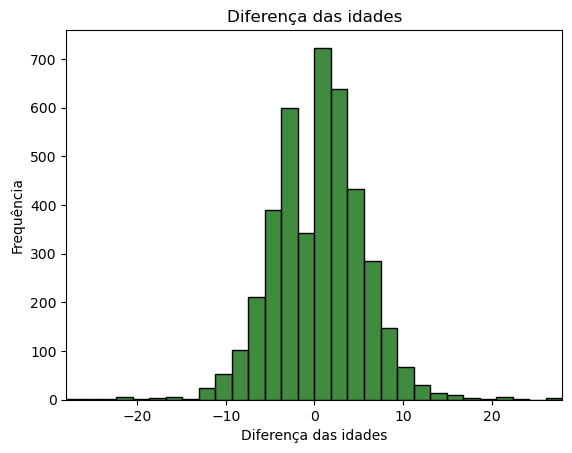

In [176]:
sns.histplot(data=belgica_raw, x='DiffAge', bins=30, kde=False, color='#006400')

plt.xlabel('Diferença das idades')
plt.ylabel('Frequência')
plt.xlim(belgica_raw['DiffAge'].min(), belgica_raw['DiffAge'].max())
plt.title('Diferença das idades')
plt.grid(False)

plt.show()

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">IMC</h2>     

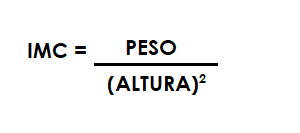

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Player</h3>     

In [97]:
len(belgica_raw[belgica_raw['Height']==0])

42

In [98]:
belgica_raw['Height'].replace(0, np.nan, inplace=True)

In [99]:
belgica_raw['Height'].isnull().sum()

42

In [100]:
regression_imputer = IterativeImputer(n_nearest_features=10)

if belgica_raw['Height'].isnull().sum() > 0:
    imputed_values = regression_imputer.fit_transform(belgica_raw[['Height']])
    imputed_height = imputed_values[:, 0]
    belgica_raw['Height'] = pd.to_numeric(imputed_height, errors='coerce')

print("Valores imputados para a coluna 'Height':")
print(belgica_raw['Height'])

Valores imputados para a coluna 'Height':
0       188.0
1       175.0
2       183.0
3       188.0
4       170.0
        ...  
4254    196.0
4255    193.0
4256    193.0
4257    188.0
4258    180.0
Name: Height, Length: 4108, dtype: float64


In [101]:
belgica_raw['Height'].isnull().sum()

0

In [102]:
belgica_raw['Weight'].unique()

array([ 77.,  73.,  90.,  88.,  68.,  91.,  75.,  85.,  72.,  78.,  70.,
       100.,  80.,  87.,  76.,  65.,  89.,  86.,   0.,  74.,  66.,  84.,
        79.,  82.,  71.,  69.,  83.,  94., 180.,  96.,  81.,  92.,  95.,
        97.,  63.,  93.,  64., 102.,  62.,  60.,  67.,  59.,  57., 110.,
        98., 186., 104.])

In [103]:
belgica_raw['Weight'].replace(0, np.nan, inplace=True)

In [104]:
regression_imputer = IterativeImputer(n_nearest_features=10)

if belgica_raw['Weight'].isnull().sum() > 0:
    imputed_values = regression_imputer.fit_transform(belgica_raw[['Weight']])
    imputed_height = imputed_values[:, 0]
    belgica_raw['Weight'] = pd.to_numeric(imputed_height, errors='coerce')

print("Valores imputados para a coluna 'Weight':")
print(belgica_raw['Weight'])

Valores imputados para a coluna 'Weight':
0       77.0
1       73.0
2       90.0
3       88.0
4       68.0
        ... 
4254    82.0
4255    83.0
4256    83.0
4257    82.0
4258    77.0
Name: Weight, Length: 4108, dtype: float64


In [105]:
belgica_raw['Weight'].isnull().sum()

0

In [106]:
belgica_raw['PlayerIMC'] = belgica_raw.apply(lambda x: int(x["Weight"]) / (int(x["Height"])/100)**2, axis=1)

In [107]:
belgica_raw = belgica_raw.drop(["Weight", "Height"], axis=1)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;"> Oponent</h3>    

In [108]:
belgica_raw.columns

Index(['Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'GameRank', 'Oponent', 'WL', 'país', 'PlayerName', 'Born', 'Treinador',
       'Rank', 'BornOponent', 'HeightOponent', 'WeightOponent',
       'TreinadorOponent', 'RankOponent', 'mainHand', 'mainHandOponent',
       'TournamentYear', 'NumeroSets', 'TipoTorneio', 'BirthYear',
       'BirthOponentYear', 'DiffAge', 'PlayerIMC'],
      dtype='object')

In [109]:
belgica_raw['HeightOponent'].replace(0, np.nan, inplace=True)

In [110]:
belgica_raw['HeightOponent'].isnull().sum()

44

In [111]:
regression_imputer = IterativeImputer(n_nearest_features=10)

if belgica_raw['HeightOponent'].isnull().sum() > 0:
    imputed_values = regression_imputer.fit_transform(belgica_raw[['HeightOponent']])
    imputed_height = imputed_values[:, 0]
    belgica_raw['HeightOponent'] = pd.to_numeric(imputed_height, errors='coerce')

print("Valores imputados para a coluna 'HeightOponent':")
print(belgica_raw['HeightOponent'])

Valores imputados para a coluna 'HeightOponent':
0       168.0
1       168.0
2       168.0
3       168.0
4       168.0
        ...  
4254    183.0
4255    198.0
4256    193.0
4257    188.0
4258    183.0
Name: HeightOponent, Length: 4108, dtype: float64


In [112]:
belgica_raw['HeightOponent'].isnull().sum()

0

In [113]:
regression_imputer = IterativeImputer(n_nearest_features=10)

if belgica_raw['WeightOponent'].isnull().sum() > 0:
    imputed_values = regression_imputer.fit_transform(belgica_raw[['WeightOponent']])
    imputed_height = imputed_values[:, 0]
    belgica_raw['WeightOponent'] = pd.to_numeric(imputed_height, errors='coerce')

print("Valores imputados para a coluna 'WeightOponent':")
print(belgica_raw['WeightOponent'])

Valores imputados para a coluna 'WeightOponent':
0       65.0
1       65.0
2       65.0
3       65.0
4       65.0
        ... 
4254    72.0
4255    88.0
4256    86.0
4257    79.0
4258    78.0
Name: WeightOponent, Length: 4108, dtype: float64


In [114]:
belgica_raw['OponentIMC'] = belgica_raw.apply(lambda x: int(x["WeightOponent"]) / (int(x["HeightOponent"])/100)**2, axis=1)

In [115]:
belgica_raw = belgica_raw.drop(["WeightOponent", "HeightOponent"], axis=1)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Diferença IMC</h3>     

In [116]:
belgica_raw["DiffIMC"] = belgica_raw['PlayerIMC'] - belgica_raw['OponentIMC']

In [117]:
belgica_raw.drop(['PlayerIMC', 'OponentIMC'], axis=1, inplace=True)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Ground</h2>     

In [118]:
belgica_raw["Ground"].unique()

array(['Clay', 'Hard', 'Carpet'], dtype=object)

In [119]:
ground = {'Clay':1, 'Hard':2, 'Carpet':3}
belgica_raw["GroundNumerico"] = belgica_raw["Ground"].map(ground)

In [120]:
belgica_raw.head(3)

,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,país,...,mainHand,mainHandOponent,TournamentYear,NumeroSets,TipoTorneio,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,127,Olivier Rochus,W,Belgium,...,Right-Handed,Right-Handed,2013,3,Melhor_de_5,1987.0,1981,-6,-1.244169,1
1,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,71,Olivier Rochus,W,Belgium,...,Right-Handed,Right-Handed,2001,5,Melhor_de_5,1978.0,1981,3,0.806689,1
2,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,50,Olivier Rochus,W,Belgium,...,Right-Handed,Right-Handed,2007,2,Melhor_de_3,1974.0,1981,7,3.844451,2


---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;"> Rank</h2>    

In [121]:
belgica_raw.columns

Index(['Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'GameRank', 'Oponent', 'WL', 'país', 'PlayerName', 'Born', 'Treinador',
       'Rank', 'BornOponent', 'TreinadorOponent', 'RankOponent', 'mainHand',
       'mainHandOponent', 'TournamentYear', 'NumeroSets', 'TipoTorneio',
       'BirthYear', 'BirthOponentYear', 'DiffAge', 'DiffIMC',
       'GroundNumerico'],
      dtype='object')

In [122]:
belgica_raw[belgica_raw['Rank']=='1722T'][["PlayerName", "Rank"]].head(10)

,PlayerName,Rank
75,Jeroen Vanneste,1722T
117,Jeroen Vanneste,1722T
118,Jeroen Vanneste,1722T
179,Jeroen Vanneste,1722T
247,Jeroen Vanneste,1722T
262,Jeroen Vanneste,1722T
311,Jeroen Vanneste,1722T
312,Jeroen Vanneste,1722T
313,Jeroen Vanneste,1722T
348,Jeroen Vanneste,1722T


In [123]:
belgica_raw["Rank"] = belgica_raw["Rank"].astype(str)  # Converte para tipo string
belgica_raw["Rank"] = belgica_raw["Rank"].apply(lambda x: re.sub(r'\D', '', x))

In [124]:
belgica_raw["RankOponent"] = belgica_raw["RankOponent"].astype(str)  # Converte para tipo string
belgica_raw["RankOponent"] = belgica_raw["RankOponent"].apply(lambda x: re.sub(r'\D', '', x))

In [125]:
belgica_raw[belgica_raw['Rank']=='1722T'][["PlayerName", "Rank"]]

,PlayerName,Rank


In [126]:
belgica_raw[belgica_raw['RankOponent']=='1722T'][["PlayerName", "Rank"]]

,PlayerName,Rank


In [127]:
belgica_raw['Rank'] = pd.to_numeric(belgica_raw['Rank'])
belgica_raw['RankOponent'] = pd.to_numeric(belgica_raw['RankOponent'])

In [128]:
from fancyimpute import IterativeImputer

# Importar por regressão
regression_imputer = IterativeImputer(n_nearest_features=10)

columns_to_impute = ["Rank", "RankOponent"]
for col in columns_to_impute:
    if belgica_raw[col].isnull().sum() > 0:
        imputed_values = regression_imputer.fit_transform(belgica_raw[[col]])
        imputed_col = imputed_values[:, 0]  # Coluna imputada
        belgica_raw[col] = pd.to_numeric(imputed_col)

print("Valores imputados para as colunas 'Rank' e 'RankOponent':")
print(belgica_raw[["Rank", "RankOponent"]])

Valores imputados para as colunas 'Rank' e 'RankOponent':
        Rank  RankOponent
0        1.0         24.0
1        4.0         24.0
2       13.0         24.0
3        1.0         24.0
4       39.0         24.0
...      ...          ...
4254    59.0        546.0
4255  1873.0         26.0
4256  1873.0        118.0
4257    13.0         41.0
4258    61.0        277.0

[4108 rows x 2 columns]


In [129]:
belgica_raw["RankOponent"].isnull().sum()

0

In [130]:
belgica_raw["DiffRank"] = belgica_raw['Rank'] - belgica_raw['RankOponent']

In [131]:
len(belgica_raw["DiffRank"])

4108

In [132]:
belgica_raw.drop(['Rank', 'RankOponent', 'GameRank'], axis=1, inplace=True)

---

<h1 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Dummies columns</h1>     

In [133]:
belgica_raw.head(3)

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,mainHandOponent,TournamentYear,NumeroSets,TipoTorneio,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,Right-Handed,2013,3,Melhor_de_5,1987.0,1981,-6,-1.244169,1,-23.0
1,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Sebastien Grosjean,...,Right-Handed,2001,5,Melhor_de_5,1978.0,1981,3,0.806689,1,-20.0
2,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,Olivier Rochus,W,Belgium,Andrei Pavel,...,Right-Handed,2007,2,Melhor_de_3,1974.0,1981,7,3.844451,2,-11.0


---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Nacionalidade da Bélgica</h2>     

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Jogadores da Bélgica?</h3>     

In [134]:
belgica_raw["Born"].fillna("", inplace=True)
belgica_raw["JogadorBelga"] = belgica_raw["Born"].str.contains("Belgium")
belgica_raw["JogadorBelga"] = belgica_raw["JogadorBelga"].astype(int)
belgica_raw

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,TournamentYear,NumeroSets,TipoTorneio,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,JogadorBelga
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,2013,3,Melhor_de_5,1987.0,1981,-6,-1.244169,1,-23.0,0
1,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Sebastien Grosjean,...,2001,5,Melhor_de_5,1978.0,1981,3,0.806689,1,-20.0,0
2,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,Olivier Rochus,W,Belgium,Andrei Pavel,...,2007,2,Melhor_de_3,1974.0,1981,7,3.844451,2,-11.0,0
3,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Andy Roddick,...,2005,5,Melhor_de_5,1982.0,1981,-1,1.868099,1,-23.0,0
4,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,125000,Round of 16,Olivier Rochus,W,Belgium,Christophe Rochus,...,1999,3,Melhor_de_3,1978.0,1981,3,0.499366,1,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,Belgium F7,"Eupen, Belgium",2018.08.06 - 2018.08.12,Clay,15000,Quarter-Finals,Matias Zukas,W,Belgium,Tomas Martin Etcheverry,...,2018,2,Melhor_de_3,1999.0,1996,-3,-0.154324,1,-487.0,0
4255,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,54604,Finals,Victor Hanescu,W,Belgium,Thiemo de Bakker,...,2012,3,Melhor_de_3,1988.0,1981,-7,-0.164212,1,1847.0,0
4256,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,54604,Quarter-Finals,Andre Ghem,W,Belgium,Thiemo de Bakker,...,2012,2,Melhor_de_3,1988.0,1982,-6,-0.805391,1,1755.0,0
4257,Antwerp,"Antwerp, Belgium",2020.10.19 - 2020.10.25,Hard,450939,Round of 32,Emil Ruusuvuori,W,Belgium,Cameron Norrie,...,2020,2,Melhor_de_3,1995.0,1999,4,0.848800,2,-28.0,0


<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Oponentes da Bélgica</h3>     

In [135]:
belgica_raw["BornOponent"].fillna("", inplace=True)
belgica_raw["OponentBelga"] = belgica_raw["BornOponent"].str.contains("Belgium")
belgica_raw["OponentBelga"] = belgica_raw["OponentBelga"].astype(int)
belgica_raw

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,NumeroSets,TipoTorneio,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,JogadorBelga,OponentBelga
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,3,Melhor_de_5,1987.0,1981,-6,-1.244169,1,-23.0,0,1
1,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Sebastien Grosjean,...,5,Melhor_de_5,1978.0,1981,3,0.806689,1,-20.0,0,1
2,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,Olivier Rochus,W,Belgium,Andrei Pavel,...,2,Melhor_de_3,1974.0,1981,7,3.844451,2,-11.0,0,1
3,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Andy Roddick,...,5,Melhor_de_5,1982.0,1981,-1,1.868099,1,-23.0,0,1
4,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,125000,Round of 16,Olivier Rochus,W,Belgium,Christophe Rochus,...,3,Melhor_de_3,1978.0,1981,3,0.499366,1,15.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,Belgium F7,"Eupen, Belgium",2018.08.06 - 2018.08.12,Clay,15000,Quarter-Finals,Matias Zukas,W,Belgium,Tomas Martin Etcheverry,...,2,Melhor_de_3,1999.0,1996,-3,-0.154324,1,-487.0,0,0
4255,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,54604,Finals,Victor Hanescu,W,Belgium,Thiemo de Bakker,...,3,Melhor_de_3,1988.0,1981,-7,-0.164212,1,1847.0,0,0
4256,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,54604,Quarter-Finals,Andre Ghem,W,Belgium,Thiemo de Bakker,...,2,Melhor_de_3,1988.0,1982,-6,-0.805391,1,1755.0,0,0
4257,Antwerp,"Antwerp, Belgium",2020.10.19 - 2020.10.25,Hard,450939,Round of 32,Emil Ruusuvuori,W,Belgium,Cameron Norrie,...,2,Melhor_de_3,1995.0,1999,4,0.848800,2,-28.0,0,0


<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Jogadores Belgas ?</h3>     

In [136]:
belgica_raw["QTDBelgas"] = belgica_raw["OponentBelga"] + belgica_raw["JogadorBelga"]

In [137]:
belgica_raw.drop(["OponentBelga", "JogadorBelga"], axis=1, inplace=True)

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Jogos nas Finais</h2>     

In [138]:
belgica_raw["GameRound"].fillna("", inplace=True)
belgica_raw["Finals"] = belgica_raw["GameRound"].str.contains("Finals")
belgica_raw["Finals"] = belgica_raw["Finals"].astype(int)
belgica_raw

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,NumeroSets,TipoTorneio,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,QTDBelgas,Finals
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,3,Melhor_de_5,1987.0,1981,-6,-1.244169,1,-23.0,1,0
1,BEL v FRA WG Rd 1,"Gent, Belgium",2001.02.05 - 2001.02.11,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Sebastien Grosjean,...,5,Melhor_de_5,1978.0,1981,3,0.806689,1,-20.0,1,0
2,Mons,"Mons, Belgium",2007.10.01 - 2007.10.07,Hard,125000,Quarter-Finals,Olivier Rochus,W,Belgium,Andrei Pavel,...,2,Melhor_de_3,1974.0,1981,7,3.844451,2,-11.0,1,1
3,BEL vs. USA WG PO,"Leuven, Belgium",2005.09.19 - 2005.09.25,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Andy Roddick,...,5,Melhor_de_5,1982.0,1981,-1,1.868099,1,-23.0,1,0
4,Ostend,"Ostend, Belgium",1999.07.05 - 1999.07.11,Clay,125000,Round of 16,Olivier Rochus,W,Belgium,Christophe Rochus,...,3,Melhor_de_3,1978.0,1981,3,0.499366,1,15.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,Belgium F7,"Eupen, Belgium",2018.08.06 - 2018.08.12,Clay,15000,Quarter-Finals,Matias Zukas,W,Belgium,Tomas Martin Etcheverry,...,2,Melhor_de_3,1999.0,1996,-3,-0.154324,1,-487.0,0,1
4255,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,54604,Finals,Victor Hanescu,W,Belgium,Thiemo de Bakker,...,3,Melhor_de_3,1988.0,1981,-7,-0.164212,1,1847.0,0,1
4256,Bercuit,"Bercuit, Belgium",2012.07.16 - 2012.07.22,Clay,54604,Quarter-Finals,Andre Ghem,W,Belgium,Thiemo de Bakker,...,2,Melhor_de_3,1988.0,1982,-6,-0.805391,1,1755.0,0,1
4257,Antwerp,"Antwerp, Belgium",2020.10.19 - 2020.10.25,Hard,450939,Round of 32,Emil Ruusuvuori,W,Belgium,Cameron Norrie,...,2,Melhor_de_3,1995.0,1999,4,0.848800,2,-28.0,0,0


---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Mão</h2>     

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Mão do PlayerName</h3>    

In [139]:
belgica_raw['mainHand_dummy'] = np.where(belgica_raw['mainHand'].eq('Right-Handed'), 1, 0)

In [140]:
belgica_raw.head(1)

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,TipoTorneio,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,QTDBelgas,Finals,mainHand_dummy
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,Melhor_de_5,1987.0,1981,-6,-1.244169,1,-23.0,1,0,1


<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;"> Mão do Oponente</h3>    

In [141]:
belgica_raw['mainHandOponent_dummy'] = np.where(belgica_raw['mainHandOponent'].eq('Right-Handed'), 1, 0)

In [142]:
belgica_raw.head(1)

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,QTDBelgas,Finals,mainHand_dummy,mainHandOponent_dummy
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,1987.0,1981,-6,-1.244169,1,-23.0,1,0,1,1


<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Ambos Destros ?</h3>     

In [143]:
belgica_raw['SumMainHand'] = belgica_raw['mainHand_dummy'] + belgica_raw['mainHandOponent_dummy']

In [144]:
belgica_raw.drop(['mainHandOponent_dummy', 'mainHand_dummy'], axis=1, inplace=True)

In [169]:
len(belgica_raw[belgica_raw['SumMainHand'] == 0])

74

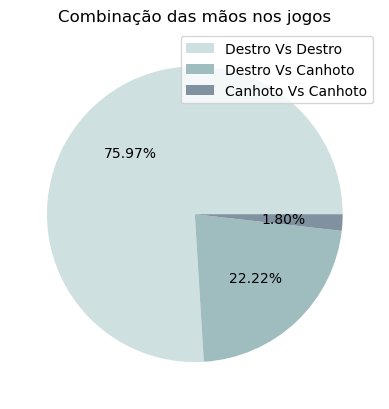

In [170]:
# Definir a paleta de cores usando o Seaborn
sns.set_palette("bone_r")

# Dados do gráfico de pizza
ground_data = belgica_raw["SumMainHand"].value_counts()
labels = ["Destro Vs Destro", "Destro Vs Canhoto", "Canhoto Vs Canhoto"]

# Desenhar o gráfico de pizza com a paleta de cores definida
plt.pie(ground_data, autopct='%.2f%%')

# Personalizar o título e a legenda
plt.title("Combinação das mãos nos jogos")
plt.legend(labels)

# Exibir o gráfico
plt.show()

---

<h2 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Tem treinador ?</h2>  

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Player</h3>     

In [145]:
belgica_raw['PlayerTreinador'] = belgica_raw['Treinador'].notnull().astype(int)

In [146]:
belgica_raw.head(1)

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,BirthYear,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,QTDBelgas,Finals,SumMainHand,PlayerTreinador
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,1987.0,1981,-6,-1.244169,1,-23.0,1,0,2,1


In [147]:
belgica_raw.drop("Treinador", axis=1, inplace=True)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Oponent</h3>      

In [148]:
belgica_raw.columns

Index(['Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'Oponent', 'WL', 'país', 'PlayerName', 'Born', 'BornOponent',
       'TreinadorOponent', 'mainHand', 'mainHandOponent', 'TournamentYear',
       'NumeroSets', 'TipoTorneio', 'BirthYear', 'BirthOponentYear', 'DiffAge',
       'DiffIMC', 'GroundNumerico', 'DiffRank', 'QTDBelgas', 'Finals',
       'SumMainHand', 'PlayerTreinador'],
      dtype='object')

In [149]:
belgica_raw['OponentTreinador'] = belgica_raw['TreinadorOponent'].notnull().astype(int)

In [150]:
belgica_raw.head(1)

,Tournament,Location,Date,Ground,Prize,GameRound,Oponent,WL,país,PlayerName,...,BirthOponentYear,DiffAge,DiffIMC,GroundNumerico,DiffRank,QTDBelgas,Finals,SumMainHand,PlayerTreinador,OponentTreinador
0,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,0,Round Robin,Olivier Rochus,W,Belgium,Novak Djokovic,...,1981,-6,-1.244169,1,-23.0,1,0,2,1,1


In [151]:
belgica_raw.drop("TreinadorOponent", axis=1, inplace=True)

<h3 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 40px;
margin: 0.5em auto;
text-align: left;
cursor: wait;
letter-spacing: 10;">Ambos têm treinadores ?</h3>      

In [152]:
belgica_raw["SumTrainer"] = belgica_raw['PlayerTreinador'] + belgica_raw['OponentTreinador']

In [153]:
belgica_raw.drop(['PlayerTreinador', 'OponentTreinador'], axis=1, inplace=True)

---

<h1 style="background-size:2em 2em;background-position:0em 1em,1em 0,0em 1em,1em 0,0 0,0 0,0 0,0 0,0 0;background-image:linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(45deg,#000 8%,transparent 8%,transparent 92%,#000 92%),linear-gradient(-45deg,transparent 17%,#000 17%,#000 21%,transparent 21%,transparent 79%,#000 79%,#000 83%,transparent 83%),linear-gradient(45deg,transparent 29%,#000 29%,#000 33%,transparent 33%,transparent 67%,#000 67%,#000 71%,transparent 71%),linear-gradient(-135deg,#202020 10%,#090909 33%,transparent 33%,transparent 67%,#161616 67%,#202020 90%),linear-gradient(135deg,transparent 21%,#161616 21%,#2d2d2d 32.6%,#161616 64.5%,#202020 70.3%,#090909 79%,transparent 79%),linear-gradient(-135deg,transparent 21%,#161616 21%,#202020 40%,#202020 60%,#090909 79%,transparent 79%);
color: white;
font-weight: 40;
font-size: 50px;
margin: 0.5em auto;
text-align: center;
cursor: wait;
letter-spacing: 10;">Extras</h1>      

In [154]:
belgica_raw.columns

Index(['Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'Oponent', 'WL', 'país', 'PlayerName', 'Born', 'BornOponent',
       'mainHand', 'mainHandOponent', 'TournamentYear', 'NumeroSets',
       'TipoTorneio', 'BirthYear', 'BirthOponentYear', 'DiffAge', 'DiffIMC',
       'GroundNumerico', 'DiffRank', 'QTDBelgas', 'Finals', 'SumMainHand',
       'SumTrainer'],
      dtype='object')

In [155]:
belgica_raw.drop(["país", "Date", "WL", 'mainHand', 'mainHandOponent', 'BirthYear', 'BirthOponentYear', 'Born', 'BornOponent', 'GameRound', 'Ground', 'Location'], axis=1, inplace=True)

In [156]:
belgica_raw.columns

Index(['Tournament', 'Prize', 'Oponent', 'PlayerName', 'TournamentYear',
       'NumeroSets', 'TipoTorneio', 'DiffAge', 'DiffIMC', 'GroundNumerico',
       'DiffRank', 'QTDBelgas', 'Finals', 'SumMainHand', 'SumTrainer'],
      dtype='object')

In [157]:
belgica_raw = belgica_raw.reindex(columns=['PlayerName', 'Oponent', 'Tournament', 
                                           'GroundNumerico', 'Prize', 'TournamentYear', 'NumeroSets', 'DiffIMC', 'DiffAge', 'DiffRank', 
                                           'QTDBelgas', 'Finals', 'SumMainHand', 'SumTrainer','TipoTorneio'])

In [158]:
belgica_raw.reset_index(drop=True, inplace=True)

In [159]:
belgica_raw.reset_index()

,index,PlayerName,Oponent,Tournament,GroundNumerico,Prize,TournamentYear,NumeroSets,DiffIMC,DiffAge,DiffRank,QTDBelgas,Finals,SumMainHand,SumTrainer,TipoTorneio
0,0,Novak Djokovic,Olivier Rochus,BEL vs. SRB WG 1st RD,1,0,2013,3,-1.244169,-6,-23.0,1,0,2,2,Melhor_de_5
1,1,Sebastien Grosjean,Olivier Rochus,BEL v FRA WG Rd 1,1,0,2001,5,0.806689,3,-20.0,1,0,2,2,Melhor_de_5
2,2,Andrei Pavel,Olivier Rochus,Mons,2,125000,2007,2,3.844451,7,-11.0,1,1,2,1,Melhor_de_3
3,3,Andy Roddick,Olivier Rochus,BEL vs. USA WG PO,1,0,2005,5,1.868099,-1,-23.0,1,0,2,2,Melhor_de_5
4,4,Christophe Rochus,Olivier Rochus,Ostend,1,125000,1999,3,0.499366,3,15.0,2,0,2,2,Melhor_de_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,4103,Tomas Martin Etcheverry,Matias Zukas,Belgium F7,1,15000,2018,2,-0.154324,-3,-487.0,0,1,2,2,Melhor_de_3
4104,4104,Thiemo de Bakker,Victor Hanescu,Bercuit,1,54604,2012,3,-0.164212,-7,1847.0,0,1,2,2,Melhor_de_3
4105,4105,Thiemo de Bakker,Andre Ghem,Bercuit,1,54604,2012,2,-0.805391,-6,1755.0,0,1,2,2,Melhor_de_3
4106,4106,Cameron Norrie,Emil Ruusuvuori,Antwerp,2,450939,2020,2,0.848800,4,-28.0,0,0,1,2,Melhor_de_3


In [160]:
belgica_raw.to_csv("belgica_cleaned.csv", index = False, encoding='utf-8')

In [161]:
belgica_raw.shape

(4108, 15)